(-0.5, 299.5, 299.5, -0.5)

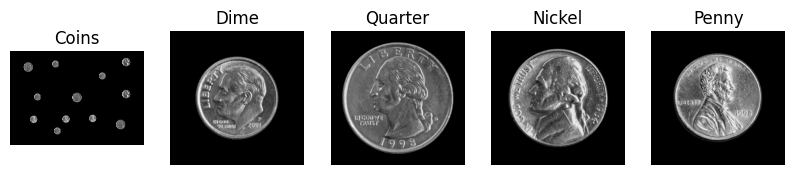

In [55]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


coins = cv.imread('D:/Academics/image_processing/images/coins/coins.png', cv.IMREAD_GRAYSCALE)
dime = cv.imread('D:/Academics/image_processing/images/coins/Dime.png', cv.IMREAD_GRAYSCALE)
quarter = cv.imread('D:/Academics/image_processing/images/coins/Quarter.png', cv.IMREAD_GRAYSCALE)
nickel = cv.imread('D:/Academics/image_processing/images/coins/Nickel.png', cv.IMREAD_GRAYSCALE)
penny = cv.imread('D:/Academics/image_processing/images/coins/Penny.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.subplot(1, 5, 1)
plt.imshow(coins, cmap='gray')
plt.title('Coins')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(dime, cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(quarter, cmap='gray')
plt.title('Quarter')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(nickel, cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(penny, cmap='gray')
plt.title('Penny')
plt.axis('off')


In [56]:
coins.shape

(2480, 3508)

Template matched responses

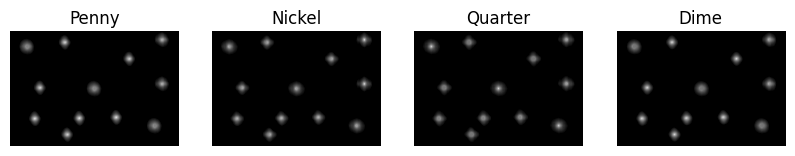

In [57]:
p_res = cv.matchTemplate(coins, penny, cv.TM_CCOEFF_NORMED)
n_res = cv.matchTemplate(coins, nickel, cv.TM_CCOEFF_NORMED)
q_res = cv.matchTemplate(coins, quarter, cv.TM_CCOEFF_NORMED)
d_res = cv.matchTemplate(coins, dime, cv.TM_CCOEFF_NORMED)

plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(p_res, cmap='gray', vmin=0, vmax=1)
plt.title('Penny')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(n_res, cmap='gray', vmin=0, vmax=1)
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(q_res, cmap='gray', vmin=0, vmax=1)
plt.title('Quarter')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(d_res, cmap='gray', vmin=0, vmax=1)
plt.title('Dime')
plt.axis('off')

plt.show()

Stacking the responses as a 3D image

In [58]:
stack = np.stack([p_res, n_res, d_res, q_res], axis=2)
stack.shape

(2181, 3209, 4)

[[ 166 2892    1]
 [1002 2892    1]
 [1074  572    2]
 [1638 2016    0]
 [1962 1092    2]
 [1654 1316    0]
 [1662  472    0]
 [ 214 1044    2]
 [ 294  328    3]
 [ 526 2268    2]
 [1090 1604    3]
 [1794 2748    3]]


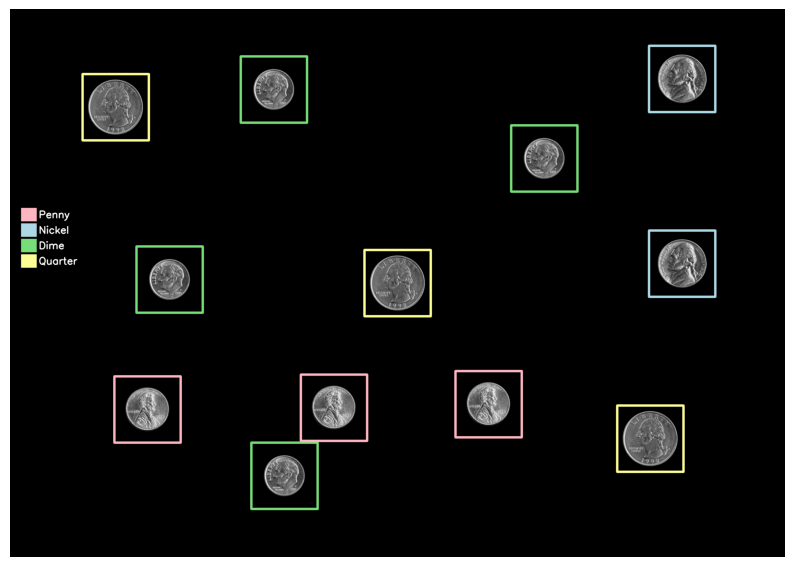

In [59]:
from skimage.feature import peak_local_max

colours = [
  (255, 182, 193), # Pastel Pink 
  (173, 216, 230), # Pastel Blue 
  (119, 221, 119), # Pastel Green
  (253, 253, 150)  # Pastel Yellow
]

coins_rgb = cv.cvtColor(coins, cv.COLOR_GRAY2RGB)

# Find the local maxima in the stacked responses
coordinates = peak_local_max(stack, exclude_border=0, min_distance=5, threshold_abs=0.8)
print(coordinates)

# Plot on each color 
for coord in coordinates:
  y, x, c = coord
  template_shape = [penny.shape, nickel.shape, dime.shape, quarter.shape][c]
  cv.rectangle(coins_rgb, (x, y), (x + template_shape[1], y + template_shape[0]), colours[c], thickness=10)

template_names = ["Penny", "Nickel", "Dime", "Quarter"]

# Draw the legend on the mid-left corner of the image
legend_x, legend_y = 50, 900  # Starting position for the legend
legend_height = 70  
font_scale = 1.5  
thickness = 3  

for i, (name, colour) in enumerate(zip(template_names, colours)):
    cv.rectangle(coins_rgb, (legend_x, legend_y + i * legend_height), (legend_x + 70, legend_y + (i + 1) * legend_height - 10), colour, thickness=-1)
    cv.putText(coins_rgb, name, (legend_x + 80, legend_y + i * legend_height + 45), cv.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness, cv.LINE_AA)

plt.figure(figsize=(10, 10))
plt.imshow(coins_rgb)
plt.axis('off')
plt.show()

Coins in the picture

In [60]:
#count the number of each coins

penny_count = 0
nickel_count = 0
dime_count = 0
quarter_count = 0

for (y, x, c) in coordinates:
    if c == 0:
        penny_count += 1
    elif c == 1:
        nickel_count += 1
    elif c == 2:
        dime_count += 1
    elif c == 3:
        quarter_count += 1

print(f"Penny: {penny_count}")
print(f"Nickel: {nickel_count}")
print(f"Dime: {dime_count}")
print(f"Quarter: {quarter_count}")
    

Penny: 3
Nickel: 2
Dime: 4
Quarter: 3


In [61]:
#calculate the total value of the coins

penny_value = 0.01
nickel_value = 0.05
dime_value = 0.1
quarter_value = 0.25

total_value = penny_count * penny_value + nickel_count * nickel_value + dime_count * dime_value + quarter_count * quarter_value
print(f"Total value: ${total_value:.2f}")

Total value: $1.28


Assumptions that has been made

- Coins do not overlap on top of one another
- Coins have not flipped
- Coins have not disoriented.
- Template is accurate.